In [50]:
from pathlib import Path
import pandas as pd
import geopandas as gpd
import os
from geodatasets import get_path

from eee.resource.validation.database import ValidationDatabase

In [51]:
validation_database_path = Path.home()/"OneDrive-3E/RD_ResourceData/Research/Solar/validation/validation_database_lhn"

In [52]:
## instantiate validation database
db = ValidationDatabase(validation_database_path)

## inventory

In [53]:
db.get_sites()

SitesInventory(n=292)

In [54]:
sites_inv = db.get_sites()
sites_inv

SitesInventory(n=292)

In [55]:
sites_inv_df = sites_inv.df

In [56]:
sites_inv_df = sites_inv_df[(sites_inv_df["variable_name"]=="ghi")&(sites_inv_df["source"]!="bsrn")]

In [57]:
sites_inv_df

,name,domain,latitude,longitude,source,classification,device_type,project_reference,variable_name,variable_physical_parameter_id,variable_units,variable_height,variable_time_granularity,variable_start,variable_end,variable_temporal_aggregation_method,variable_temporal_aggregation_period,variable_temporal_aggregation_timestamp_convention,variable_data_availability_percent
id,,,,,,,,,,,,,,,,,,,
energydata_1,bdfe2_feni,solar,22.800,91.358,energydata,public,pyranometer,None,ghi,ghi,W/m²,None,0 days 00:01:00,2017-06-08 00:01:00+00:00,2019-09-30 23:59:00+00:00,mean,1min,undefined,62.81
energydata_2,ceb_substation_dapaong_togo,solar,10.892,0.190,energydata,public,pyranometer,None,ghi,ghi,W/m²,None,0 days 00:01:00,2021-10-25 05:43:00+00:00,2022-10-24 23:49:00+00:00,mean,1min,undefined,51.06
energydata_3,ceb_substation_davie_togo,solar,6.393,1.186,energydata,public,pyranometer,None,ghi,ghi,W/m²,None,0 days 00:01:00,2021-11-03 05:37:00+00:00,2022-11-02 17:29:00+00:00,mean,1min,undefined,50.03
energydata_4,ceb_substation_malanville_benin,solar,11.783,3.373,energydata,public,pyranometer,None,ghi,ghi,W/m²,None,0 days 00:01:00,2021-08-09 05:32:00+00:00,2022-08-08 17:58:00+00:00,mean,1min,undefined,50.81
energydata_5,ceb_substation_parakou_benin,solar,9.331,2.591,energydata,public,pyranometer,None,ghi,ghi,W/m²,None,0 days 00:01:00,2021-08-13 05:37:00+00:00,2022-08-12 18:01:00+00:00,mean,1min,undefined,49.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
surfrad_2,desert_rock_nevada,solar,36.624,-116.019,surfrad,public,pyranometer,None,ghi,ghi,W/m²,None,0 days 00:03:00,2005-01-01 00:00:00+00:00,2023-11-08 23:57:00+00:00,mean,3min,backward,50.75
surfrad_3,fort_peck_montana,solar,48.310,-105.100,surfrad,public,pyranometer,None,ghi,ghi,W/m²,None,0 days 00:03:00,2005-01-01 15:00:00+00:00,2023-11-08 23:39:00+00:00,mean,3min,backward,50.74
surfrad_4,goodwin_creek_mississippi,solar,34.250,-89.870,surfrad,public,pyranometer,None,ghi,ghi,W/m²,None,0 days 00:03:00,2005-01-01 13:12:00+00:00,2023-11-08 23:09:00+00:00,mean,3min,backward,50.18


In [58]:
sites_inv_gdf = gpd.GeoDataFrame(
    data=sites_inv_df,
    geometry=gpd.points_from_xy(sites_inv_df.longitude, sites_inv_df.latitude),
    crs="EPSG:4326",
)   

<Axes: >

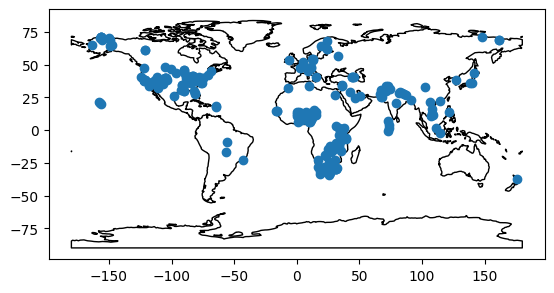

In [59]:
world = gpd.read_file(get_path("naturalearth.land"))

# We restrict to South America.
ax = world.plot(color="white", edgecolor="black")

sites_inv_gdf.plot(ax=ax)

## get some data

In [60]:
sites_inv_df.source.unique()

array(['energydata', 'enermena', 'fluxnet', 'sauran', 'solrad', 'sorms',
       'surfrad'], dtype=object)

In [61]:
list_sites = []
for source in sites_inv_df.source.unique():
    sites_inv_df_s = sites_inv_df[sites_inv_df["source"] == source]
    list_sites.append(sites_inv_df_s.name.unique()[0])

In [62]:
list_sites

['bdfe2_feni',
 'mene_unnamed_station_1',
 'arm_amf3_oliktok',
 'central_university_of_technology',
 'madison_wisconsin',
 'bluefield_state_college',
 'bondville_illinois']

In [63]:
for site in list_sites:

    site_id_ = db.get_sites(names=[site]).site_ids[0]

    site_ = sites_inv.get_site(site_id_)

    ts = db.get_measurement_timeseries(
        site=site_,
        validation_variables=["ghi"],
    ).to_dataframe()
    print(ts)
    print(ts.describe())

                           ghi_mean_1min_undefined
time                                              
2017-06-08 00:01:00+00:00                 69.84400
2017-06-08 00:02:00+00:00                 70.85630
2017-06-08 00:03:00+00:00                 72.73920
2017-06-08 00:04:00+00:00                 74.79130
2017-06-08 00:05:00+00:00                 77.35400
...                                            ...
2019-09-30 23:55:00+00:00                  1.36950
2019-09-30 23:56:00+00:00                  1.78500
2019-09-30 23:57:00+00:00                  1.98333
2019-09-30 23:58:00+00:00                  2.27900
2019-09-30 23:59:00+00:00                  2.35600

[1216799 rows x 1 columns]
       ghi_mean_1min_undefined
count            764241.000000
mean                304.208042
std                 304.088119
min                   0.000000
25%                  18.366500
50%                 205.671000
75%                 545.795000
max                1486.420000
                           ghi